# Protein Graph Mining: Basic Usage

## Parsing

The first step of graph mining with PyeMap is to create a `PDBGroup` object, and populate it `emap` objects for the PDBs of interest. Here, we'll fetch and parse a small set of flavoprotein PDBs.

In [7]:
import pyemap 
import warnings
warnings.filterwarnings("ignore")
from pyemap.graph_mining import PDBGroup 
pdb_ids = ['1X0P', '1DNP', '1EFP', '1G28', '1IQR', '1IQU', '1NP7', '1O96', '1O97', '1QNF', '1U3C', '1U3D', '2IYG', '2J4D', '2WB2', '2Z6C', '3FY4', '3ZXS', '4EER', '4GU5', '4I6G', '4U63', '6FN2', '6KII', '6LZ3', '6PU0', '6RKF'] 
pg = PDBGroup('My Group') 
for pdb in pdb_ids: 
    pg.add_emap(pyemap.fetch_and_parse(pdb,quiet=True)) 

## Generating Protein Graphs

The next step is to generate the graphs for each PDB. One can specify the chains, ET active moieties, residues, and any other kwargs from `pyemap.process`.

In [8]:
process_kwargs = {'sdef': None, 'dist_def': 'COM', 'rsa_thresh': 0.05, 'rd_thresh': 3.03, 'distance_cutoff': 20.0, 'percent_edges': 1.0, 'edge_prune': 'DEGREE', 'num_st_dev_edges': 1.0, 'coef_alpha': 1.0, 'exp_beta': 2.3, 'r_offset': 0.0} 
chains = {'1X0P': ['A'], '1DNP': ['A'], '1EFP': ['A'], '1G28': ['A'], '1IQR': ['A'], '1IQU': ['A'], '1NP7': ['A'], '1O96': ['A'], '1O97': ['C'], '1QNF': ['A'], '1U3C': ['A'], '1U3D': ['A'], '2IYG': ['A'], '2J4D': ['A'], '2WB2': ['A'], '2Z6C': ['A'], '3FY4': ['A'], '3ZXS': ['A'], '4EER': ['A'], '4GU5': ['A'], '4I6G': ['A'], '4U63': ['A'], '6FN2': ['A'], '6KII': ['A'], '6LZ3': ['A'], '6PU0': ['A'], '6RKF': ['A']} 
include_residues = ['W', 'Y'] 
included_eta_moieties = {'1X0P': ['FAD9150(A)'], '1DNP': ['FAD472(A)-1', 'FAD472(A)-2', 'MHF473(A)'], '1EFP': ['FAD399(A)-1', 'FAD399(A)-2', 'AMP400(A)'], '1G28': ['FMN1033(A)'], '1IQR': ['FAD421(A)-1', 'FAD421(A)-2'], '1IQU': ['TDR500(A)', 'FAD421(A)-1', 'FAD421(A)-2'], '1NP7': ['FAD500(A)-1', 'FAD500(A)-2'], '1O96': ['AMP1263(A)'], '1O97': ['AMP1262(C)'], '1QNF': ['FAD485(A)-1', 'FAD485(A)-2', 'HDF486(A)'], '1U3C': ['FAD510(A)-1', 'FAD510(A)-2'], '1U3D': ['FAD510(A)-1', 'FAD510(A)-2', 'ANP511(A)'], '2IYG': ['FMN1122(A)'], '2J4D': ['FAD1498(A)-1', 'FAD1498(A)-2', 'MHF1499(A)-1', 'MHF1499(A)-2'], '2WB2': ['FAD1510(A)-1', 'FAD1510(A)-2'], '2Z6C': ['FMN500(A)'], '3FY4': ['IMD901(A)', 'IMD902(A)', 'IMD905(A)', 'FAD900(A)-1', 'FAD900(A)-2'], '3ZXS': ['FAD1509(A)-1', 'FAD1509(A)-2', 'DLZ1511(A)', 'SF41510(A)'], '4EER': ['FMN1001(A)'], '4GU5': ['FAD602(A)-1', 'FAD602(A)-2'], '4I6G': ['FAD900(A)-1', 'FAD900(A)-2'], '4U63': ['MHF1001(A)', 'FAD1002(A)-1', 'FAD1002(A)-2'], '6FN2': ['FAD601(A)-1', 'FAD601(A)-2', 'HDF602(A)'], '6KII': ['FAD501(A)-1', 'FAD501(A)-2', 'MHF502(A)-1', 'MHF502(A)-2'], '6LZ3': ['FAD701(A)-1', 'FAD701(A)-2'], '6PU0': ['FAD501(A)-1', 'FAD501(A)-2'], '6RKF': ['FAD401(A)-1', 'FAD401(A)-2']} 

Call `process.emaps` to generate graphs for all of the PDBs.

In [9]:
pg.process_emaps(chains=chains, eta_moieties=included_eta_moieties, include_residues=include_residues, **process_kwargs) 

## Generate graph database
The next step is to classify the nodes and edges. One can define "substitutions" for nodes, and thresholds for edges.

In [10]:
# W and Y will be interchangeable and given the label 'X'
substitutions = ['W','Y']
# edges with weights > 12 are distinguished from those with weights < 12
edge_thresholds = [12] 
pg.generate_graph_database(sub=[],edge_thresh=edge_thresholds) 

## Mine for subgraphs
There are two types of searches available in PyeMap. One can mine for all possible subgraphs:

In [11]:
pg.run_gspan(19)

Or search for a specific pattern:

In [12]:
pg.find_subgraph('WWW#')

## Analysis: Subgraph Patterns
The identified subgraphs are stored in the `subgraph_patterns` dictionary.

In [13]:
pg.subgraph_patterns

{'1_WWW#_18': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x193620d60>,
 '2_WWW#_14': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x191ed8cd0>,
 '3_WWW#_4': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x1935f7c70>,
 '4_WWW#_2': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x1850e6e50>,
 '5_WWW#_2': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x1935f76d0>,
 '6_WWW#_2': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x193620640>,
 '7_WWW#_1': <pyemap.graph_mining.frequent_subgraph.SubgraphPattern at 0x191ed8d00>}

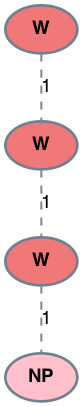

In [14]:
sg = pg.subgraph_patterns['1_WWW#_18']
sg.subgraph_to_Image()

## Analysis: Protein Subgraphs
To identify the specific residues in each PDB involved in the identified patterns, one should first call `find_protein_subgraphs`, and the identified **protein subgraphs** are stored in the `protein_subgraphs` dictionary.

In [27]:
sg.find_protein_subgraphs()
print("Number of protein subgraphs: {}".format(len(sg.protein_subgraphs)))

Number of protein subgraphs: 108


4U63_1


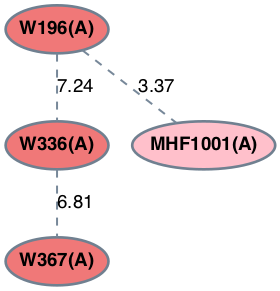

In [29]:
key = next(iter(sg.protein_subgraphs))
print(key)
sg.subgraph_to_Image(key)

### Clustering
Protein subgraphs are clustered into groups based on sequence or structural similarity. By default, structural clustering is used, and this can be switched to sequence using `set_clustering`.

In [30]:
print("Number of groups: {}".format(len(sg.groups)))
print("Size of largest group: {}".format(len(sg.groups[1])))

Number of groups: 67
Size of largest group: 16


In [31]:
sg.set_clustering("sequence")
print("Number of groups: {}".format(len(sg.groups)))
print("Size of largest group: {}".format(len(sg.groups[1])))

Number of groups: 50
Size of largest group: 18


### Visualize in nglview

In [32]:
import nglview as nv
view = nv.show_file(sg.support['1U3D'].file_path)
view.clear_representations()
view.add_cartoon(color="lightgray")
sg.visualize_subgraph_in_nglview('1U3D_50',view)
view

NGLWidget()